In [0]:
# SH-I

In [0]:
!unzip data.zip

In [0]:
from fastai.vision import *

In [0]:
path = Path('./data/')

In [0]:
tfms = get_transforms(flip_vert=True, max_zoom=0., max_warp=0.)

data = ImageDataBunch.from_folder(path, valid_pct=0.1,
        ds_tfms=tfms, size=60, num_workers=4).normalize(imagenet_stats)

In [10]:
data.classes

['background',
 'green_five',
 'green_four',
 'green_half',
 'green_half_half',
 'green_one',
 'green_one_half',
 'green_three',
 'green_three_half',
 'green_two',
 'green_two_half']

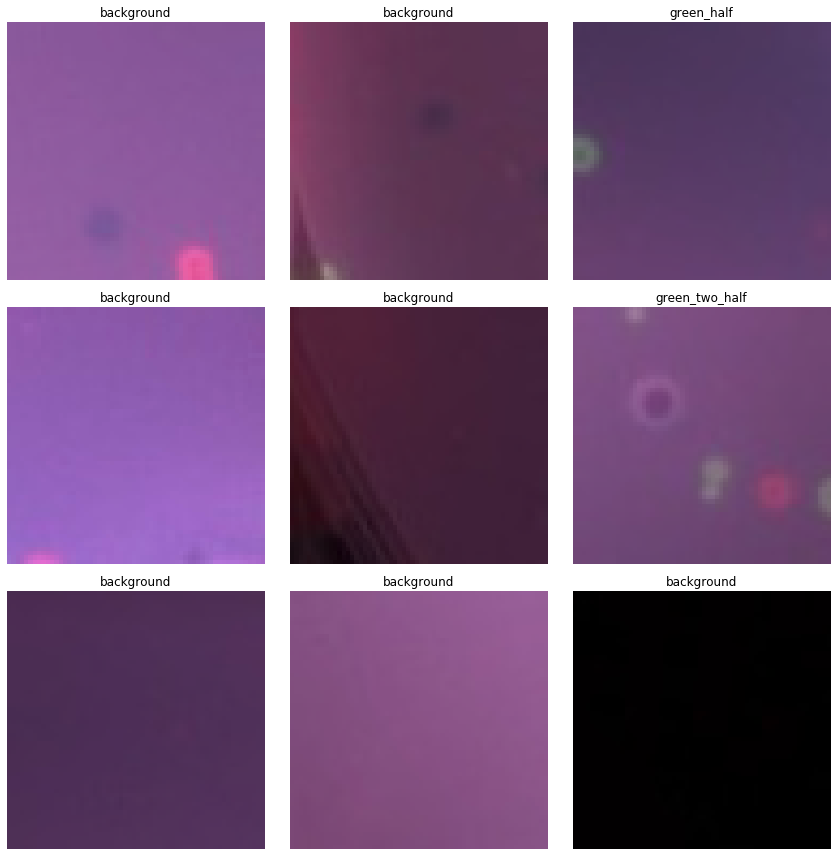

In [11]:
data.show_batch(rows=3)

In [12]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:04<00:00, 21.9MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


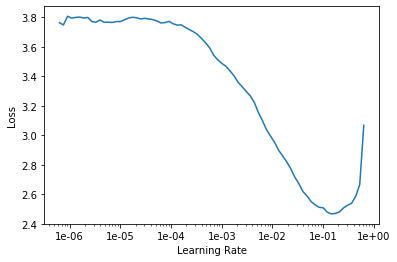

In [13]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.219992,0.234282,0.062500,00:03
1,0.212682,0.244463,0.071429,00:03
2,0.203467,0.239940,0.053571,00:03
3,0.207195,0.238851,0.053571,00:03
4,0.198712,0.242706,0.071429,00:03
5,0.195516,0.239531,0.071429,00:03
6,0.200035,0.242695,0.071429,00:03
7,0.192676,0.243268,0.062500,00:03
8,0.188637,0.238772,0.062500,00:03
9,0.183653,0.241011,0.062500,00:03


In [0]:
learn.save('stage-1') # don't touch

In [0]:
learn.save('stage-2')

In [0]:
learn.save('stage-3')

In [0]:
learn.freeze()

In [0]:
learn.unfreeze()

In [0]:
learn=learn.load('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

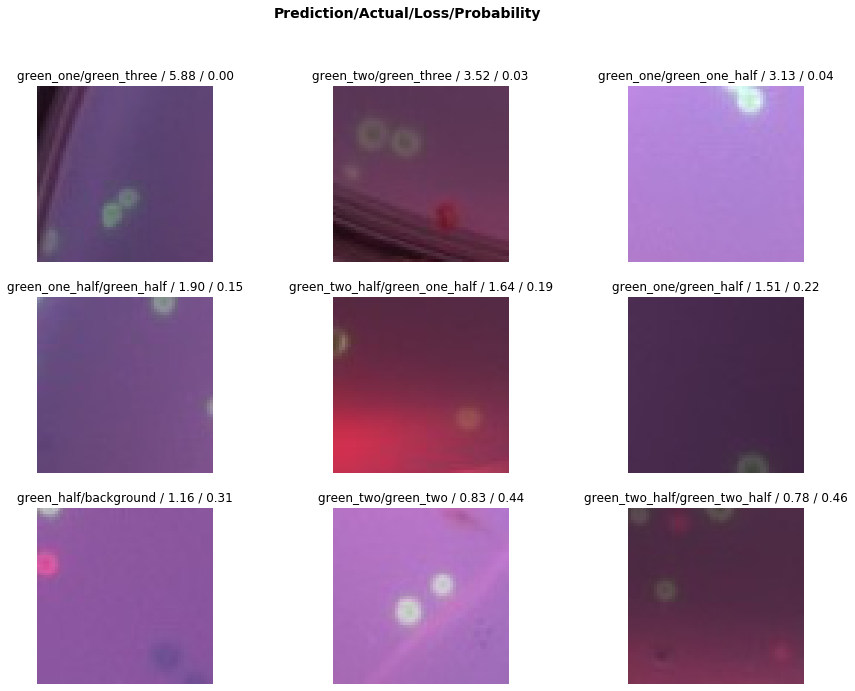

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

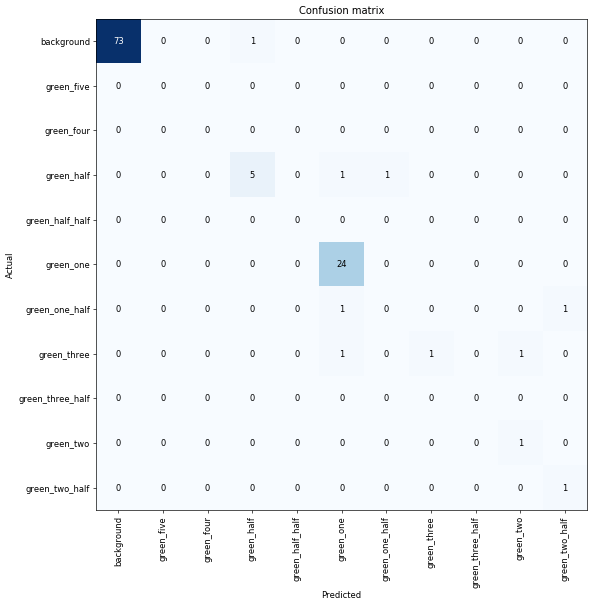

In [0]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[]

In [0]:
# learn.export()